# Lebron-James-Shot-Analysis
Dany Marcha
Anthony Shen
Eric Yo
Kevin Kim

Import Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
file_path = 'lebron_shot_data.csv'
df = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
    GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME     TEAM_ID  \
0  20300014             20       2544  LeBron James  1610612739   
1  20300014             28       2544  LeBron James  1610612739   
2  20300014             35       2544  LeBron James  1610612739   
3  20300014             39       2544  LeBron James  1610612739   
4  20300014             54       2544  LeBron James  1610612739   

             TEAM_NAME  PERIOD  MINUTES_REMAINING  SECONDS_REMAINING  \
0  Cleveland Cavaliers       1                  8                 56   
1  Cleveland Cavaliers       1                  7                 44   
2  Cleveland Cavaliers       1                  7                  1   
3  Cleveland Cavaliers       1                  6                 29   
4  Cleveland Cavaliers       1                  4                 48   

    EVENT_TYPE  ...  SHOT_ZONE_RANGE SHOT_DISTANCE LOC_X LOC_Y  \
0    Made Shot  ...         8-16 ft.            15   158     0   
1

In [5]:
# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Distribution of shots made and missed
print("\nDistribution of shots made and missed:")
print(df['SHOT_MADE_FLAG'].value_counts())


Basic statistics:
            GAME_ID  GAME_EVENT_ID  PLAYER_ID       TEAM_ID        PERIOD  \
count  2.931100e+04   29311.000000    29311.0  2.931100e+04  29311.000000   
mean   2.122812e+07     275.322882     2544.0  1.610613e+09      2.513561   
std    6.048328e+05     172.893844        0.0  4.175265e+00      1.152725   
min    2.030001e+07       1.000000     2544.0  1.610613e+09      1.000000   
25%    2.070056e+07     116.000000     2544.0  1.610613e+09      1.000000   
50%    2.120051e+07     275.000000     2544.0  1.610613e+09      3.000000   
75%    2.170095e+07     401.000000     2544.0  1.610613e+09      3.000000   
max    2.230123e+07     833.000000     2544.0  1.610613e+09      7.000000   

       MINUTES_REMAINING  SECONDS_REMAINING  SHOT_DISTANCE         LOC_X  \
count       29311.000000       29311.000000   29311.000000  29311.000000   
mean            5.044352          28.290676      11.708744     -9.263075   
std             3.458327          17.593051      10.336964 

Code above demonstrates there are no missing data

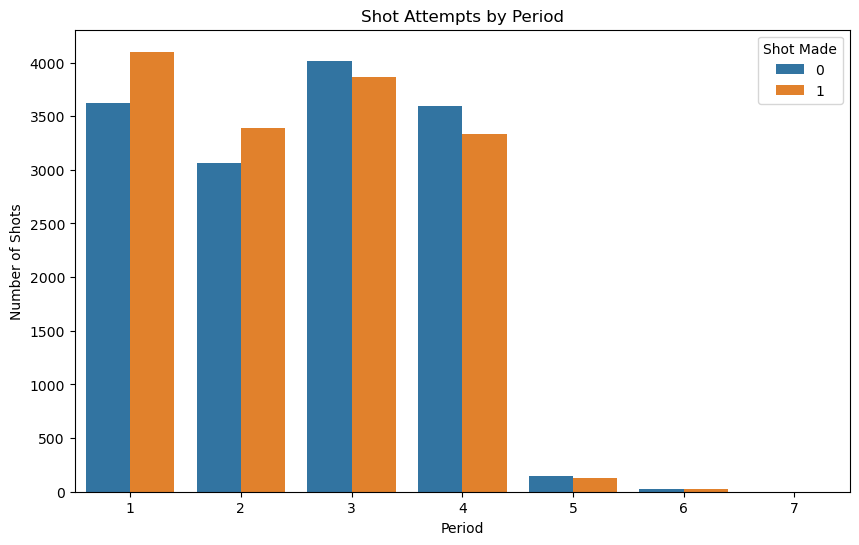

In [6]:
# Visualize the distribution of shot attempts by period
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PERIOD', hue='SHOT_MADE_FLAG')
plt.title('Shot Attempts by Period')
plt.xlabel('Period')
plt.ylabel('Number of Shots')
plt.legend(title='Shot Made')
plt.show()

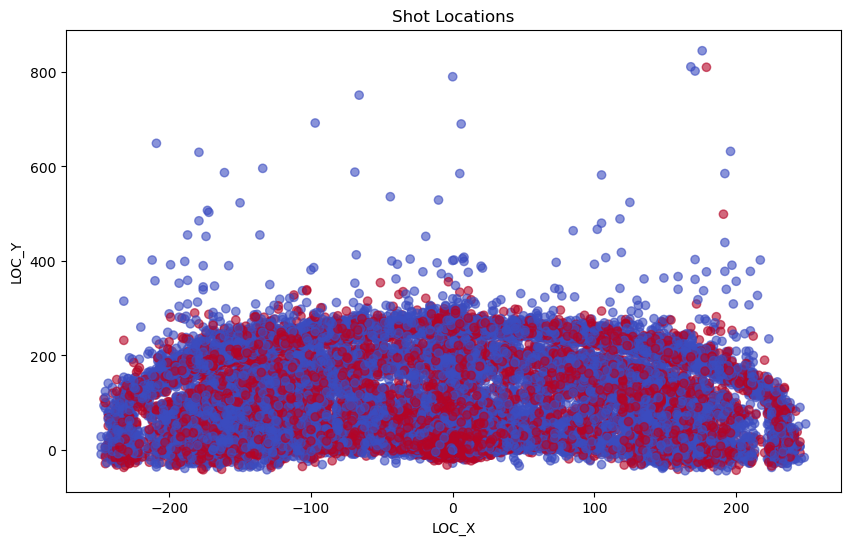

In [7]:
# Visualize shot location (x, y) on the court
plt.figure(figsize=(10, 6))
plt.scatter(df['LOC_X'], df['LOC_Y'], c=df['SHOT_MADE_FLAG'], cmap='coolwarm', alpha=0.6)
plt.title('Shot Locations')
plt.xlabel('LOC_X')
plt.ylabel('LOC_Y')
plt.show()

In [8]:
# Calculate shooting percentage by shot type
shot_type_percentage = df.groupby('SHOT_TYPE')['SHOT_MADE_FLAG'].mean().reset_index()
shot_type_percentage.columns = ['SHOT_TYPE', 'SHOOTING_PERCENTAGE']
print("\nShooting percentage by shot type:")
print(shot_type_percentage)


Shooting percentage by shot type:
        SHOT_TYPE  SHOOTING_PERCENTAGE
0  2PT Field Goal             0.555099
1  3PT Field Goal             0.348065


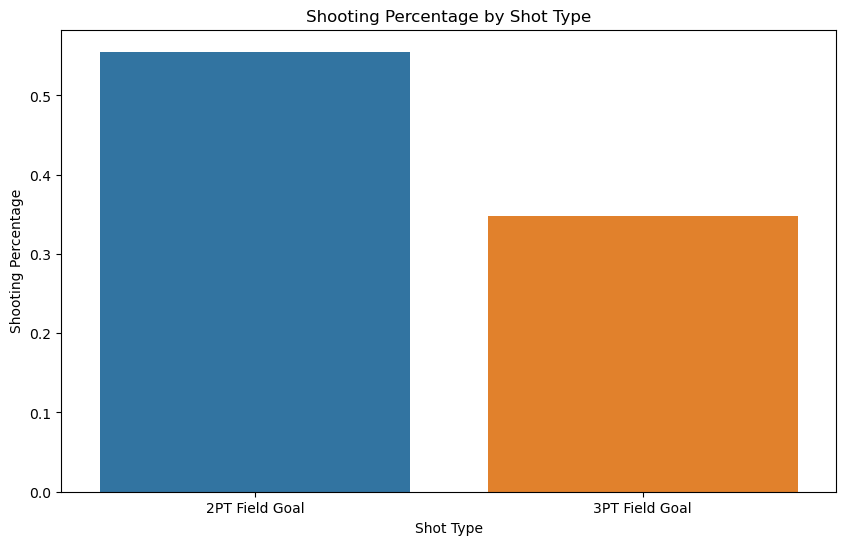

In [9]:
# Visualize shooting percentage by shot type
plt.figure(figsize=(10, 6))
sns.barplot(data=shot_type_percentage, x='SHOT_TYPE', y='SHOOTING_PERCENTAGE')
plt.title('Shooting Percentage by Shot Type')
plt.xlabel('Shot Type')
plt.ylabel('Shooting Percentage')
plt.show()

In [10]:
df.dtypes

GAME_ID                 int64
GAME_EVENT_ID           int64
PLAYER_ID               int64
PLAYER_NAME            object
TEAM_ID                 int64
TEAM_NAME              object
PERIOD                  int64
MINUTES_REMAINING       int64
SECONDS_REMAINING       int64
EVENT_TYPE             object
ACTION_TYPE            object
SHOT_TYPE              object
SHOT_ZONE_BASIC        object
SHOT_ZONE_AREA         object
SHOT_ZONE_RANGE        object
SHOT_DISTANCE           int64
LOC_X                   int64
LOC_Y                   int64
SHOT_ATTEMPTED_FLAG     int64
SHOT_MADE_FLAG          int64
GAME_DATE               int64
HTM                    object
VTM                    object
SEASON                 object
dtype: object

In [12]:
# Calculate field goal percentage (FG%)
total_field_goals_made = df['SHOT_MADE_FLAG'].sum()
total_field_goals_attempted = df['SHOT_ATTEMPTED_FLAG'].sum()
field_goal_percentage = total_field_goals_made / total_field_goals_attempted

# Calculate three-point percentage (3P%)
three_pointers_made = df[df['SHOT_TYPE'] == '3PT Field Goal']['SHOT_MADE_FLAG'].sum()
three_pointers_attempted = df[df['SHOT_TYPE'] == '3PT Field Goal']['SHOT_ATTEMPTED_FLAG'].sum()
three_point_percentage = three_pointers_made / three_pointers_attempted

# Calculate effective field goal percentage (eFG%)
total_two_pointers_made = df[df['SHOT_TYPE'] == '2PT Field Goal']['SHOT_MADE_FLAG'].sum()
total_two_pointers_attempted = df[df['SHOT_TYPE'] == '2PT Field Goal']['SHOT_ATTEMPTED_FLAG'].sum()
eFG_percentage = (total_two_pointers_made + 1.5 * three_pointers_made) / total_field_goals_attempted

# Calculate true shooting percentage (TS%)
total_points_scored = df['POINTS'].sum()
true_shooting_percentage = total_points_scored / (2 * total_field_goals_attempted + 0.44 * total_field_goals_attempted)

# Calculate points per shot (PPS)
points_per_shot = total_points_scored / total_field_goals_attempted

# Print the efficiency metrics
print("LeBron James' Efficiency Metrics:")
print(f"Field Goal Percentage (FG%): {field_goal_percentage:.2%}")
print(f"Three-Point Percentage (3P%): {three_point_percentage:.2%}")
print(f"Effective Field Goal Percentage (eFG%): {eFG_percentage:.2%}")
print(f"True Shooting Percentage (TS%): {true_shooting_percentage:.2%}")
print(f"Points Per Shot (PPS): {points_per_shot:.2f}")


KeyError: 'POINTS'

In [ ]:
def classify_season(date):
    year = int(date[:4])
    if int(date[4:6]) < 8:
        return f"{year - 1}-{str(year)[2:]}"
    else:
        return f"{year}-{str(year + 1)[2:]}"



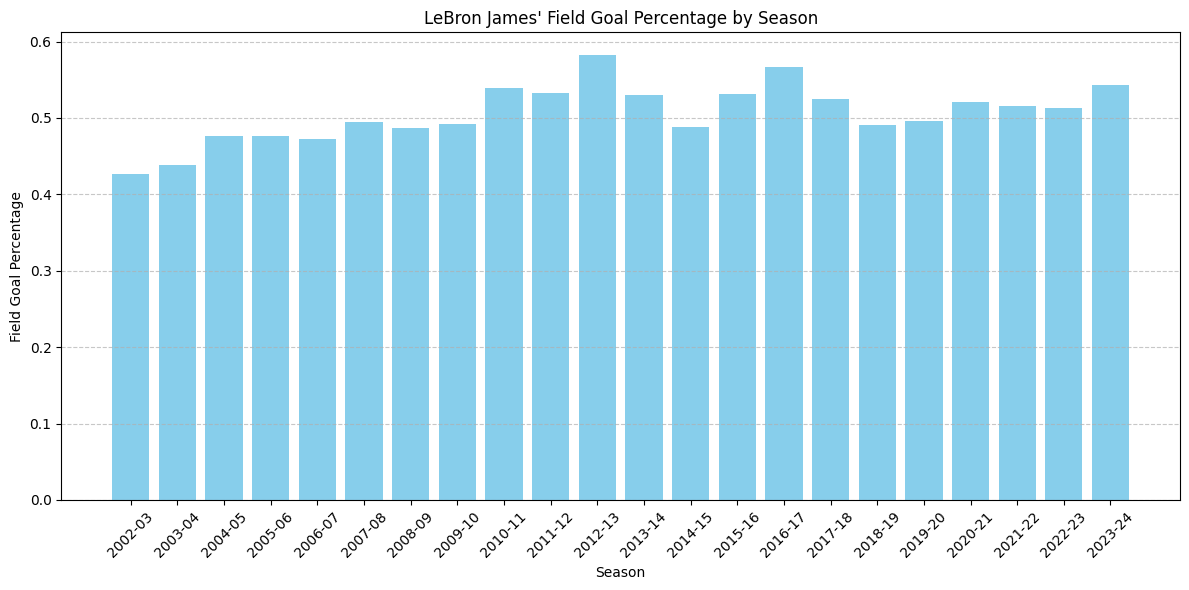

In [ ]:

# Plot field goal percentage by season
plt.figure(figsize=(12, 6))
plt.bar(season_fg_percentage['SEASON'], season_fg_percentage['SHOT_MADE_FLAG'], color='skyblue')
plt.title("LeBron James' Field Goal Percentage by Season")
plt.xlabel('Season')
plt.ylabel('Field Goal Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


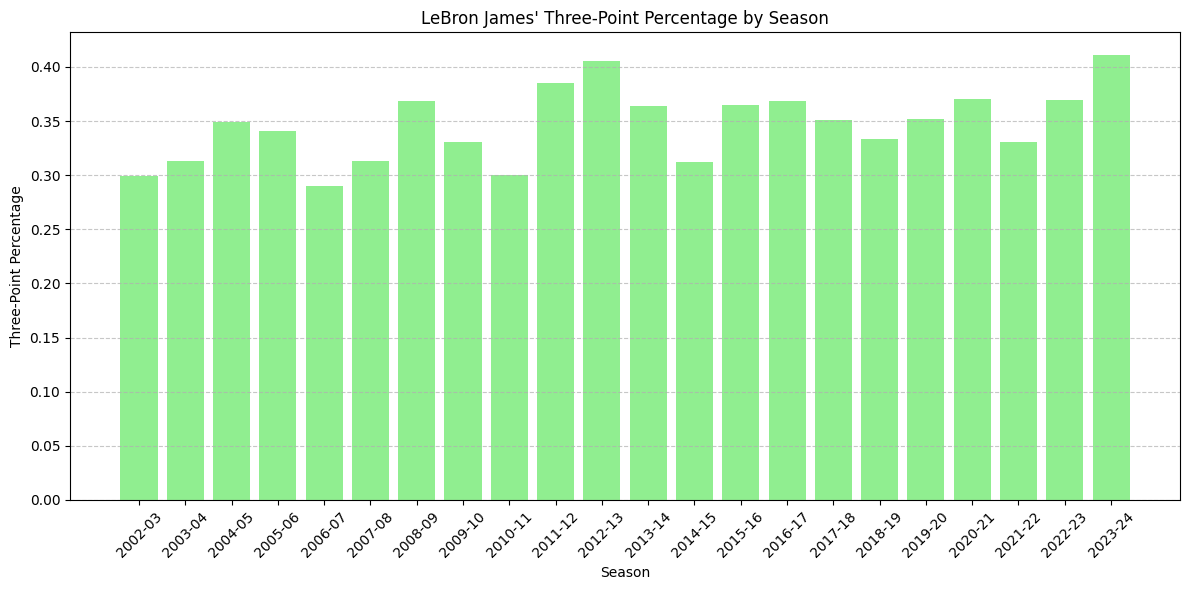

In [ ]:
df['SEASON'] = df['GAME_DATE'].astype(str).apply(classify_season)
season_3p_percentage = df[df['SHOT_TYPE'] == '3PT Field Goal'].groupby('SEASON')['SHOT_MADE_FLAG'].mean().reset_index()

# Plot three-point percentage by season
plt.figure(figsize=(12, 6))
plt.bar(season_3p_percentage['SEASON'], season_3p_percentage['SHOT_MADE_FLAG'], color='lightgreen')
plt.title("LeBron James' Three-Point Percentage by Season")
plt.xlabel('Season')
plt.ylabel('Three-Point Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
shot_type_encoded = pd.get_dummies(df['SHOT_TYPE'], prefix='SHOT_TYPE')
shot_zone_area_encoded = pd.get_dummies(df['SHOT_ZONE_AREA'], prefix='SHOT_ZONE_AREA')

df_encoded = pd.concat([df, shot_type_encoded, shot_zone_area_encoded], axis=1)

df_encoded.drop(['SHOT_TYPE', 'SHOT_ZONE_AREA'], axis=1, inplace=True)

print(df_encoded.head())

    GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME     TEAM_ID  \
0  20300014             20       2544  LeBron James  1610612739   
1  20300014             28       2544  LeBron James  1610612739   
2  20300014             35       2544  LeBron James  1610612739   
3  20300014             39       2544  LeBron James  1610612739   
4  20300014             54       2544  LeBron James  1610612739   

             TEAM_NAME  PERIOD  MINUTES_REMAINING  SECONDS_REMAINING  \
0  Cleveland Cavaliers       1                  8                 56   
1  Cleveland Cavaliers       1                  7                 44   
2  Cleveland Cavaliers       1                  7                  1   
3  Cleveland Cavaliers       1                  6                 29   
4  Cleveland Cavaliers       1                  4                 48   

    EVENT_TYPE  ...  VTM   SEASON SHOT_TYPE_2PT Field Goal  \
0    Made Shot  ...  CLE  2003-04                     True   
1    Made Shot  ...  CLE  2003-04       

In [21]:
# Create a new dataframe with necessary features to predict if Lebron will make or miss the shot
columns_needed = ['MINUTES_REMAINING', 'SECONDS_REMAINING', 'SHOT_TYPE_2PT Field Goal', 'SHOT_TYPE_3PT Field Goal', 'SHOT_ZONE_AREA_Back Court(BC)',
                  'SHOT_ZONE_AREA_Center(C)', 'SHOT_ZONE_AREA_Left Side Center(LC)', 'SHOT_ZONE_AREA_Left Side(L)', 'SHOT_ZONE_AREA_Right Side Center(RC)', 'SHOT_ZONE_AREA_Right Side(R)', 
                  'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG']
cleaned_df = df_encoded[columns_needed].copy()

print(cleaned_df.head())

   MINUTES_REMAINING  SECONDS_REMAINING  SHOT_TYPE_2PT Field Goal  \
0                  8                 56                      True   
1                  7                 44                      True   
2                  7                  1                      True   
3                  6                 29                      True   
4                  4                 48                      True   

   SHOT_TYPE_3PT Field Goal  SHOT_ZONE_AREA_Back Court(BC)  \
0                     False                          False   
1                     False                          False   
2                     False                          False   
3                     False                          False   
4                     False                          False   

   SHOT_ZONE_AREA_Center(C)  SHOT_ZONE_AREA_Left Side Center(LC)  \
0                     False                                False   
1                     False                                False   
2       

In [26]:
print(cleaned_df.isnull().sum())

MINUTES_REMAINING                       0
SECONDS_REMAINING                       0
SHOT_TYPE_2PT Field Goal                0
SHOT_TYPE_3PT Field Goal                0
SHOT_ZONE_AREA_Back Court(BC)           0
SHOT_ZONE_AREA_Center(C)                0
SHOT_ZONE_AREA_Left Side Center(LC)     0
SHOT_ZONE_AREA_Left Side(L)             0
SHOT_ZONE_AREA_Right Side Center(RC)    0
SHOT_ZONE_AREA_Right Side(R)            0
SHOT_DISTANCE                           0
LOC_X                                   0
LOC_Y                                   0
SHOT_ATTEMPTED_FLAG                     0
SHOT_MADE_FLAG                          0
dtype: int64


TypeError: 'numpy.int64' object is not callable

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into features (X) and target variable (y)
X = cleaned_df.drop('SHOT_MADE_FLAG', axis=1)
y = cleaned_df['SHOT_MADE_FLAG']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logistic_model = LogisticRegression()

# Train the logistic regression model
logistic_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6512024560805049

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      2916
           1       0.66      0.62      0.64      2947

    accuracy                           0.65      5863
   macro avg       0.65      0.65      0.65      5863
weighted avg       0.65      0.65      0.65      5863



/Users/ericyo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
